In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from prawn_predictor import DataProcessor

In [2]:
data_processor = DataProcessor()
df = data_processor.df
df.GeoID.unique().shape

['Brazil' 'United Kingdom' 'United States']


(192,)

In [3]:
m1 = df['GeoID'] == 'United States / New York'
# m2 = df['NewCases']>0
# start_date = '2020-9-1'
# m3 = df['Date'] > start_date
df1 = df[ m1].copy()

In [4]:
df1.tail()

,CountryName,RegionName,GeoID,Date,ConfirmedCases,ConfirmedDeaths,Population,C1_School closing,C2_Workplace closing,C3_Cancel public events,...,H3_Contact tracing,H6_Facial Coverings,NewCases,NewDeaths,SmoothNewCases,SmoothNewDeaths,CaseRatio,DeathRatio,ProportionInfected,PredictionRatio
79341,United States,New York,United States / New York,2020-11-21,590823.0,34296.0,19453561.0,2.0,3.0,2.0,...,2.0,3.0,5973.0,44.0,4896.000000,40.857143,1.017366,1.104247,0.030371,1.049232
79342,United States,New York,United States / New York,2020-11-22,596214.0,34319.0,19453561.0,2.0,3.0,2.0,...,2.0,3.0,5391.0,23.0,5144.857143,41.000000,1.050829,1.003497,0.030648,1.084053
79343,United States,New York,United States / New York,2020-11-23,602120.0,34339.0,19453561.0,2.0,3.0,2.0,...,2.0,3.0,5906.0,20.0,5490.000000,40.714286,1.067085,0.993031,0.030952,1.101168
79344,United States,New York,United States / New York,2020-11-24,607001.0,34362.0,19453561.0,2.0,3.0,2.0,...,2.0,3.0,4881.0,23.0,5460.428571,29.428571,0.994614,0.722807,0.031203,1.026648
79345,United States,New York,United States / New York,2020-11-25,613266.0,34388.0,19453561.0,2.0,3.0,2.0,...,2.0,3.0,6265.0,26.0,5599.142857,28.714286,1.025404,0.975728,0.031525,1.058781


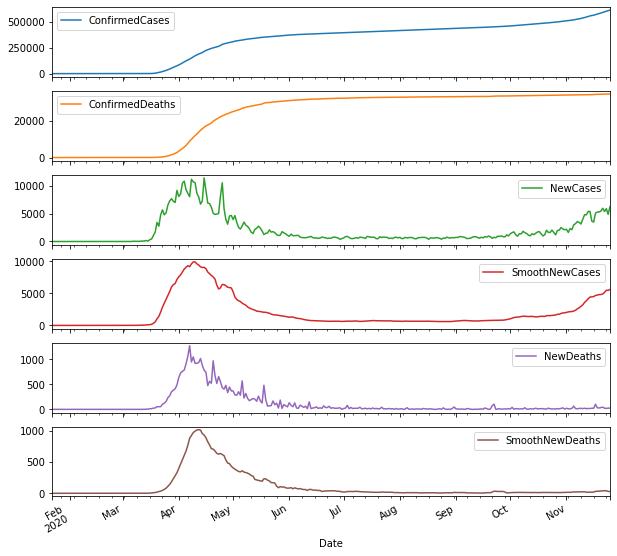

In [5]:
df1[['Date','ConfirmedCases','ConfirmedDeaths','NewCases','SmoothNewCases','NewDeaths','SmoothNewDeaths']].plot(x='Date',subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [6]:
df2 = df[['GeoID','Date','NewCases']].copy()
y= df2[df2['Date']=='2020-11-24'][['GeoID','NewCases']]
m1 = df2['Date'] > '2020-11-1'
m2 = df2['Date']<'2020-11-24'
df2 = df2[ m1&m2 ]
df2

,GeoID,Date,NewCases
306,Aruba,2020-11-02,6.0
307,Aruba,2020-11-03,5.0
308,Aruba,2020-11-04,14.0
309,Aruba,2020-11-05,15.0
310,Aruba,2020-11-06,11.0
...,...,...,...
87971,Zimbabwe,2020-11-19,36.0
87972,Zimbabwe,2020-11-20,65.0
87973,Zimbabwe,2020-11-21,74.0
87974,Zimbabwe,2020-11-22,52.0


In [7]:
# from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
#     load_robot_execution_failures
# download_robot_execution_failures()
# timeseries, y = load_robot_execution_failures()

In [8]:
# timeseries.head()
# timeseries.tail()

In [9]:
from tsfresh import extract_features
extracted_features = extract_features(df2, column_id="GeoID",column_sort="Date",column_kind=None, column_value=None)
extracted_features

Feature Extraction: 100%|██████████| 28/28 [00:02<00:00,  9.55it/s]


,NewCases__variance_larger_than_standard_deviation,NewCases__has_duplicate_max,NewCases__has_duplicate_min,NewCases__has_duplicate,NewCases__sum_values,NewCases__abs_energy,NewCases__mean_abs_change,NewCases__mean_change,NewCases__mean_second_derivative_central,NewCases__median,...,NewCases__fourier_entropy__bins_2,NewCases__fourier_entropy__bins_3,NewCases__fourier_entropy__bins_5,NewCases__fourier_entropy__bins_10,NewCases__fourier_entropy__bins_100,NewCases__permutation_entropy__dimension_3__tau_1,NewCases__permutation_entropy__dimension_4__tau_1,NewCases__permutation_entropy__dimension_5__tau_1,NewCases__permutation_entropy__dimension_6__tau_1,NewCases__permutation_entropy__dimension_7__tau_1
Afghanistan,1.0,0.0,1.0,1.0,3270.0,721250.0,133.523810,5.714286,3.375,129.0,...,0.450561,0.450561,0.721464,1.314374,2.210254,1.765057,2.378620,2.736339,2.833213,2.772589
Albania,1.0,0.0,0.0,0.0,11886.0,6850258.0,52.285714,11.333333,-4.150,516.0,...,0.450561,0.566086,0.836988,1.098612,2.253858,1.009763,1.229099,1.457125,1.691559,1.927392
Algeria,1.0,0.0,0.0,1.0,16920.0,14220730.0,58.857143,36.095238,2.425,827.5,...,0.286836,0.286836,0.286836,0.286836,1.349792,1.583276,2.229051,2.659323,2.833213,2.772589
Andorra,1.0,0.0,1.0,1.0,1500.0,144326.0,59.238095,-0.952381,-0.250,63.5,...,0.562335,0.823959,1.198849,1.424130,2.369382,1.239608,2.159732,2.630253,2.833213,2.772589
Angola,1.0,0.0,0.0,1.0,3935.0,822647.0,77.190476,-7.952381,-4.550,167.5,...,0.562335,0.918428,1.445186,2.022809,2.484907,1.735434,2.406160,2.813355,2.833213,2.772589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,1.0,0.0,1.0,1.0,4562.0,1345794.0,155.047619,11.238095,8.500,211.5,...,0.286836,0.721464,0.983088,1.357978,2.253858,1.765057,2.725550,2.890372,2.833213,2.772589
Venezuela,1.0,0.0,1.0,1.0,7822.0,4501484.0,402.857143,24.095238,9.950,333.5,...,0.450561,0.721464,1.118743,1.748155,2.369382,1.722800,2.479122,2.890372,2.833213,2.772589
Vietnam,1.0,0.0,1.0,1.0,126.0,1640.0,6.571429,0.000000,-0.325,3.5,...,0.450561,0.721464,1.236685,1.748155,2.369382,1.669580,2.451583,2.736339,2.751667,2.772589
Zambia,1.0,0.0,0.0,1.0,992.0,60986.0,31.904762,-0.857143,-0.150,42.5,...,0.679193,0.887694,1.424130,1.424130,2.253858,1.782047,2.725550,2.813355,2.833213,2.772589


In [10]:
y=pd.Series(y['NewCases'].to_numpy(), index=y['GeoID'])

In [11]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
extracted_features
impute(extracted_features)
features_filtered = select_features(extracted_features, y)

/Users/brook/venvs/covid-xprize/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['NewCases__fft_coefficient__attr_"real"__coeff_12'
 'NewCases__fft_coefficient__attr_"real"__coeff_13'
 'NewCases__fft_coefficient__attr_"real"__coeff_14'
 'NewCases__fft_coefficient__attr_"real"__coeff_15'
 'NewCases__fft_coefficient__attr_"real"__coeff_16'
 'NewCases__fft_coefficient__attr_"real"__coeff_17'
 'NewCases__fft_coefficient__attr_"real"__coeff_18'
 'NewCases__fft_coefficient__attr_"real"__coeff_19'
 'NewCases__fft_coefficient__attr_"real"__coeff_20'
 'NewCases__fft_coefficient__attr_"real"__coeff_21'
 'NewCases__fft_coefficient__attr_"real"__coeff_22'
 'NewCases__fft_coefficient__attr_"real"__coeff_23'
 'NewCases__fft_coefficient__attr_"real"__coeff_24'
 'NewCases__fft_coefficient__attr_"real"__coeff_25'
 'NewCases__fft_coefficient__attr_"real"__coeff_26'
 'NewCases__fft_coefficient__attr_"real"__coeff_27'
 'NewCases__fft_coefficient__attr_

In [12]:
features_filtered

,NewCases__has_duplicate,NewCases__c3__lag_3,"NewCases__cwt_coefficients__coeff_14__w_10__widths_(2, 5, 10, 20)",NewCases__c3__lag_2,NewCases__c3__lag_1,NewCases__median,NewCases__quantile__q_0.7,"NewCases__cwt_coefficients__coeff_13__w_10__widths_(2, 5, 10, 20)","NewCases__cwt_coefficients__coeff_14__w_20__widths_(2, 5, 10, 20)",NewCases__quantile__q_0.6,...,NewCases__large_standard_deviation__r_0.05,"NewCases__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.6",NewCases__symmetry_looking__r_0.15000000000000002,NewCases__partial_autocorrelation__lag_7,NewCases__autocorrelation__lag_2,NewCases__fourier_entropy__bins_3,"NewCases__fft_coefficient__attr_""imag""__coeff_7","NewCases__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""min""",NewCases__benford_correlation,NewCases__approximate_entropy__m_2__r_0.1
Afghanistan,1.0,3.726527e+06,550.276701,3.013871e+06,2.087631e+06,129.0,192.4,537.056078,519.428301,150.8,...,1.0,0.0,1.0,-0.593286,0.222701,0.450561,-33.262653,0.567312,0.895254,0.048790
Albania,0.0,1.625214e+08,1920.770854,1.761484e+08,1.895632e+08,516.0,587.4,1897.704875,1884.800297,550.6,...,1.0,0.0,1.0,-0.441375,0.665585,0.566086,50.267790,0.830748,-0.331017,0.149252
Algeria,1.0,5.213846e+08,2858.368565,5.483955e+08,5.643938e+08,827.5,897.1,2817.718770,2767.270081,856.4,...,1.0,441.0,1.0,-0.147152,0.732308,0.286836,182.355942,0.973868,0.362382,0.104854
Andorra,1.0,4.002798e+05,212.936491,3.233003e+05,1.675411e+05,63.5,73.9,222.949753,227.136934,66.2,...,1.0,0.0,1.0,-0.484795,0.023005,0.823959,-27.395303,0.656531,0.261101,0.017224
Angola,1.0,4.568424e+06,488.756389,5.425677e+06,6.118994e+06,167.5,224.6,505.033830,544.428696,199.0,...,1.0,0.0,1.0,-0.206047,0.141137,0.918428,-290.088947,-0.820729,0.904882,0.048790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,1.0,8.638376e+06,680.007417,8.188289e+06,6.991263e+06,211.5,227.4,694.961296,695.305654,222.4,...,1.0,0.0,1.0,-0.056893,-0.310207,0.721464,-143.055700,0.008822,0.430237,0.094107
Venezuela,1.0,3.538674e+07,1153.442406,4.493778e+07,1.640463e+07,333.5,392.6,1155.418530,1158.788734,382.4,...,1.0,0.0,1.0,0.253539,-0.033897,0.721464,-441.122685,0.707107,-0.073636,0.145951
Vietnam,1.0,1.216875e+02,22.061018,1.498889e+02,1.482500e+02,3.5,8.1,22.434476,18.706491,4.6,...,1.0,0.0,1.0,0.034735,-0.311166,0.721464,-26.349320,0.288675,0.944154,0.048790
Zambia,1.0,8.359825e+04,119.585255,1.133557e+05,1.094915e+05,42.5,56.7,122.373649,128.712130,48.6,...,1.0,0.0,1.0,-0.496975,0.241045,0.887694,117.864362,-0.309173,0.343050,0.017224


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from tsfresh.transformers import RelevantFeatureAugmenter

pipeline = Pipeline([('augmenter', RelevantFeatureAugmenter(column_id="GeoID",column_sort="Date",column_kind=None, column_value=None)),
            ('regressor', RandomForestRegressor())])
pipeline.set_params(augmenter__timeseries_container=df2)
X = pd.DataFrame(index=y.index)
pipeline.fit(X, y)

Feature Extraction: 100%|██████████| 28/28 [00:02<00:00, 10.63it/s]
/Users/brook/venvs/covid-xprize/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['NewCases__fft_coefficient__attr_"real"__coeff_12'
 'NewCases__fft_coefficient__attr_"real"__coeff_13'
 'NewCases__fft_coefficient__attr_"real"__coeff_14'
 'NewCases__fft_coefficient__attr_"real"__coeff_15'
 'NewCases__fft_coefficient__attr_"real"__coeff_16'
 'NewCases__fft_coefficient__attr_"real"__coeff_17'
 'NewCases__fft_coefficient__attr_"real"__coeff_18'
 'NewCases__fft_coefficient__attr_"real"__coeff_19'
 'NewCases__fft_coefficient__attr_"real"__coeff_20'
 'NewCases__fft_coefficient__attr_"real"__coeff_21'
 'NewCases__fft_coefficient__attr_"real"__coeff_22'
 'NewCases__fft_coefficient__attr_"real"__coeff_23'
 'NewCases__fft_coefficient__attr_"real"__coeff_24'
 'NewCases__fft_coefficient__attr_"real"__coeff_25'
 'NewCases__fft_coefficient__attr_"real"__coeff_26'
 'NewCases__fft_co

Pipeline(steps=[('augmenter',
                 RelevantFeatureAugmenter(column_id='GeoID', column_sort='Date',
                                          timeseries_container=          GeoID       Date  NewCases
306       Aruba 2020-11-02       6.0
307       Aruba 2020-11-03       5.0
308       Aruba 2020-11-04      14.0
309       Aruba 2020-11-05      15.0
310       Aruba 2020-11-06      11.0
...         ...        ...       ...
87971  Zimbabwe 2020-11-19      36.0
87972  Zimbabwe 2020-11-20      65.0
87973  Zimbabwe 2020-11-21      74.0
87974  Zimbabwe 2020-11-22      52.0
87975  Zimbabwe 2020-11-23      48.0

[4224 rows x 3 columns])),
                ('regressor', RandomForestRegressor())])

In [14]:
pipeline.score(X,y)

Feature Extraction: 100%|██████████| 28/28 [00:01<00:00, 14.27it/s]


0.8997224902453429

In [15]:
y.index

Index(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Australia', 'Austria', 'Burundi',
       ...
       'United States / Washington', 'United States / Wisconsin',
       'United States / West Virginia', 'United States / Wyoming',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'South Africa', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='GeoID', length=192)

In [16]:
r=pipeline[1]

In [ ]:
r.feature_importances_

In [ ]:
import pandas as pd
df = pd.DataFrame({
   "id": [1, 1, 1, 1, 2, 2],
   "time": [1, 2, 3, 4, 8, 9],
   "x": [1, 2, 3, 4, 10, 11],
   "y": [5, 6, 7, 8, 12, 13],
})

In [ ]:
from tsfresh.utilities.dataframe_functions import roll_time_series
df_rolled = roll_time_series(df2, column_id="GeoID", column_sort="Date")

In [ ]:
df_rolled.drop(['GeoID'], axis=1, inplace=True)
#df_rolled

In [17]:
r.feature_importances_

array([4.52678414e-06, 6.95250589e-05, 3.50900636e-02, 7.66745214e-03,
       9.15493448e-04, 8.04027362e-04, 2.80090401e-04, 1.67606071e-02,
       1.42607387e-02, 2.22575579e-03, 1.12452219e-02, 5.44142842e-02,
       4.29633063e-04, 4.47047259e-05, 3.08837461e-04, 1.56842827e-03,
       4.01369500e-02, 3.07244025e-04, 1.66597782e-04, 1.90300972e-03,
       1.02347895e-03, 1.47666877e-04, 6.45993327e-04, 5.23964217e-03,
       1.35399739e-04, 3.68551340e-02, 8.26210335e-02, 1.04604197e-02,
       1.11755508e-02, 1.15005591e-05, 1.84487794e-02, 1.47585929e-04,
       2.58021547e-02, 9.40817553e-06, 1.10900258e-04, 1.11787146e-02,
       9.38703807e-03, 8.95456176e-03, 1.94503710e-03, 2.03945335e-05,
       4.32276308e-05, 1.90567109e-04, 9.23365232e-03, 6.46563168e-03,
       2.10740794e-03, 5.65817182e-07, 3.86094287e-06, 1.87802915e-02,
       2.80646944e-04, 8.25460351e-03, 1.93552675e-02, 2.26098305e-04,
       9.08451003e-03, 1.06615150e-02, 2.02066723e-05, 9.85788556e-04,
      

In [18]:
import pandas as pd
df = pd.DataFrame({
   "id": [1, 1, 1, 1, 2, 2],
   "time": [1, 2, 3, 4, 8, 9],
   "x": [1, 2, 3, 4, 10, 11],
   "y": [5, 6, 7, 8, 12, 13],
})

In [19]:
from tsfresh.utilities.dataframe_functions import roll_time_series
df_rolled = roll_time_series(df2, column_id="GeoID", column_sort="Date")

Rolling: 100%|██████████| 22/22 [00:02<00:00, 10.30it/s]


In [20]:
df_rolled.drop(['GeoID'], axis=1, inplace=True)
#df_rolled

In [21]:
r.feature_importances_

array([4.52678414e-06, 6.95250589e-05, 3.50900636e-02, 7.66745214e-03,
       9.15493448e-04, 8.04027362e-04, 2.80090401e-04, 1.67606071e-02,
       1.42607387e-02, 2.22575579e-03, 1.12452219e-02, 5.44142842e-02,
       4.29633063e-04, 4.47047259e-05, 3.08837461e-04, 1.56842827e-03,
       4.01369500e-02, 3.07244025e-04, 1.66597782e-04, 1.90300972e-03,
       1.02347895e-03, 1.47666877e-04, 6.45993327e-04, 5.23964217e-03,
       1.35399739e-04, 3.68551340e-02, 8.26210335e-02, 1.04604197e-02,
       1.11755508e-02, 1.15005591e-05, 1.84487794e-02, 1.47585929e-04,
       2.58021547e-02, 9.40817553e-06, 1.10900258e-04, 1.11787146e-02,
       9.38703807e-03, 8.95456176e-03, 1.94503710e-03, 2.03945335e-05,
       4.32276308e-05, 1.90567109e-04, 9.23365232e-03, 6.46563168e-03,
       2.10740794e-03, 5.65817182e-07, 3.86094287e-06, 1.87802915e-02,
       2.80646944e-04, 8.25460351e-03, 1.93552675e-02, 2.26098305e-04,
       9.08451003e-03, 1.06615150e-02, 2.02066723e-05, 9.85788556e-04,
      

In [22]:
import pandas as pd
df = pd.DataFrame({
   "id": [1, 1, 1, 1, 2, 2],
   "time": [1, 2, 3, 4, 8, 9],
   "x": [1, 2, 3, 4, 10, 11],
   "y": [5, 6, 7, 8, 12, 13],
})

In [23]:
from tsfresh.utilities.dataframe_functions import roll_time_series
df_rolled = roll_time_series(df2, column_id="GeoID", column_sort="Date")

Rolling: 100%|██████████| 22/22 [00:02<00:00, 10.32it/s]


In [24]:
df_rolled.drop(['GeoID'], axis=1, inplace=True)
#df_rolled

In [25]:
r.feature_importances_

array([4.52678414e-06, 6.95250589e-05, 3.50900636e-02, 7.66745214e-03,
       9.15493448e-04, 8.04027362e-04, 2.80090401e-04, 1.67606071e-02,
       1.42607387e-02, 2.22575579e-03, 1.12452219e-02, 5.44142842e-02,
       4.29633063e-04, 4.47047259e-05, 3.08837461e-04, 1.56842827e-03,
       4.01369500e-02, 3.07244025e-04, 1.66597782e-04, 1.90300972e-03,
       1.02347895e-03, 1.47666877e-04, 6.45993327e-04, 5.23964217e-03,
       1.35399739e-04, 3.68551340e-02, 8.26210335e-02, 1.04604197e-02,
       1.11755508e-02, 1.15005591e-05, 1.84487794e-02, 1.47585929e-04,
       2.58021547e-02, 9.40817553e-06, 1.10900258e-04, 1.11787146e-02,
       9.38703807e-03, 8.95456176e-03, 1.94503710e-03, 2.03945335e-05,
       4.32276308e-05, 1.90567109e-04, 9.23365232e-03, 6.46563168e-03,
       2.10740794e-03, 5.65817182e-07, 3.86094287e-06, 1.87802915e-02,
       2.80646944e-04, 8.25460351e-03, 1.93552675e-02, 2.26098305e-04,
       9.08451003e-03, 1.06615150e-02, 2.02066723e-05, 9.85788556e-04,
      

In [26]:
import pandas as pd
df = pd.DataFrame({
   "id": [1, 1, 1, 1, 2, 2],
   "time": [1, 2, 3, 4, 8, 9],
   "x": [1, 2, 3, 4, 10, 11],
   "y": [5, 6, 7, 8, 12, 13],
})

In [27]:
from tsfresh.utilities.dataframe_functions import roll_time_series
df_rolled = roll_time_series(df2, column_id="GeoID", column_sort="Date")

Rolling: 100%|██████████| 22/22 [00:02<00:00, 10.35it/s]


In [28]:
df_rolled.drop(['GeoID'], axis=1, inplace=True)
#df_rolled

In [29]:
from tsfresh import extract_features

df_features = extract_features(df_rolled, column_id="id", column_sort="Date")

Feature Extraction: 100%|██████████| 30/30 [00:34<00:00,  1.14s/it]


In [30]:
df_features

NewCases__variance_larger_than_standard_deviation  \
Afghanistan 2020-11-02                                                0.0   
            2020-11-03                                                1.0   
            2020-11-04                                                1.0   
            2020-11-05                                                1.0   
            2020-11-06                                                1.0   
...                                                                   ...   
Zimbabwe    2020-11-19                                                1.0   
            2020-11-20                                                1.0   
            2020-11-21                                                1.0   
            2020-11-22                                                1.0   
            2020-11-23                                                1.0   

                        NewCases__has_duplicate_max  \
Afghanistan 2020-11-02                          0.0   
            2020-11-03                          0.0   
            2020-11-04                          0.0   
            2020-11-05                          0.0   
            2020-11-06                          0.0   
...                                             ...   
Zimbabwe    2020-11-19                          0.0   
            2020-11-20                          0.0   
            2020-11-21                          0.0   
            2020-11-22                          0.0   
            2020-11-23                          0.0   

                        NewCases__has_duplicate_min  NewCases__has_duplicate  \
Afghanistan 2020-11-02                          0.0                      0.0   
            2020-11-03                          0.0                      0.0   
            2020-11-04                          0.0                      0.0   
            2020-11-05                          0.0                      0.0   
            2020-11-06                          0.0                      0.0   
...                                             ...                      ...   
Zimbabwe    2020-11-19                          0.0                      1.0   
            2020-11-20                          0.0                      1.0   
            2020-11-21                          0.0                      1.0   
            2020-11-22                          0.0                      1.0   
            2020-11-23                          0.0                      1.0   

                        NewCases__sum_values  NewCases__abs_energy  \
Afghanistan 2020-11-02                 132.0               17424.0   
            2020-11-03                 227.0               26449.0   
            2020-11-04                 313.0               33845.0   
            2020-11-05                 434.0               48486.0   
            2020-11-06                 474.0               50086.0   
...                                      ...                   ...   
Zimbabwe    2020-11-19                 619.0               32449.0   
            2020-11-20                 684.0               36674.0   
            2020-11-21                 758.0               42150.0   
            2020-11-22                 810.0               44854.0   
            2020-11-23                 858.0               47158.0   

                        NewCases__mean_abs_change  NewCases__mean_change  \
Afghanistan 2020-11-02                        NaN                    NaN   
            2020-11-03                  37.000000             -37.000000   
            2020-11-04                  23.000000             -23.000000   
            2020-11-05                  27.000000              -3.666667   
            2020-11-06                  40.500000             -23.000000   
...                                           ...                    ...   
Zimbabwe    2020-11-19                  22.470588               1.411765   
            2020-11-20      